In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
spark = SparkSession.builder \
       .master("local") \
       .enableHiveSupport() \
       .appName("Spark ML") \
       .getOrCreate()
sc = spark.sparkContext

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
passengers = train['PassengerId'].max()

In [9]:
print (passengers)


891


In [10]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [11]:
train[train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [33]:
mendata = train[train.Sex == 'male']
womendata = train[train.Sex == 'female']

No of males: 577
No of females: 314


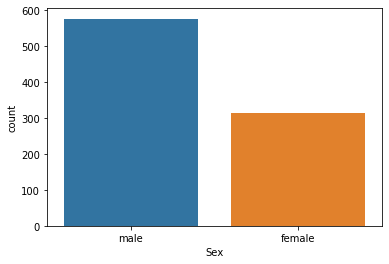

In [32]:
print("No of males: " + str(mendata.count()['Sex']))
print("No of females: " + str(womendata.count()['Sex']))


gender = sns.countplot(data=train,x='Sex')

plt.show()

Survived
0    549
1    342
Name: PassengerId, dtype: int64
0= did not survive
1= survive


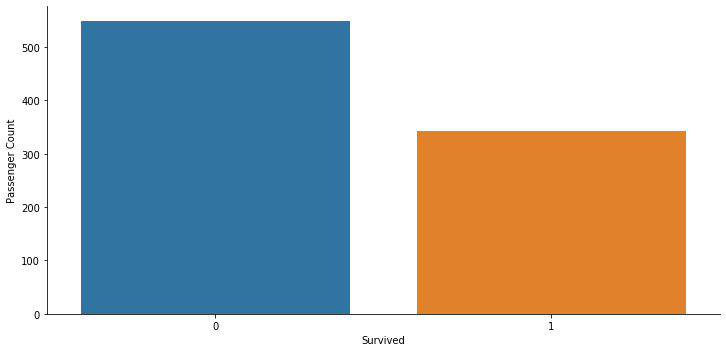

In [42]:
print(train.groupby('Survived')['PassengerId'].count())
print('0= did not survive')
print('1= survive')

survival_dist = sns.factorplot('Survived',data=train,kind = 'count', aspect = 2)

plt.ylabel("Passenger Count")
plt.show()

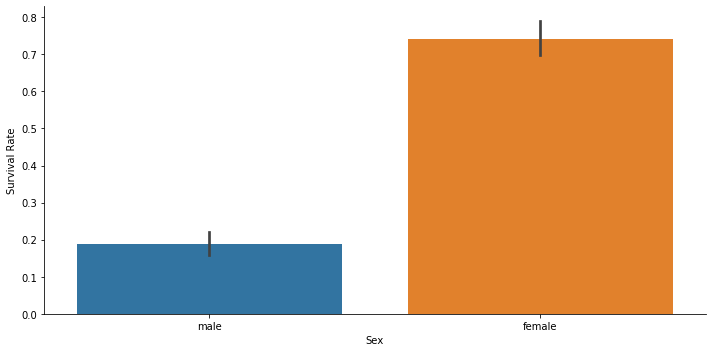

In [43]:
survival_by_gender = sns.factorplot('Sex','Survived',data=train,kind = 'bar', aspect = 2)
plt.ylabel("Survival Rate")
plt.show()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


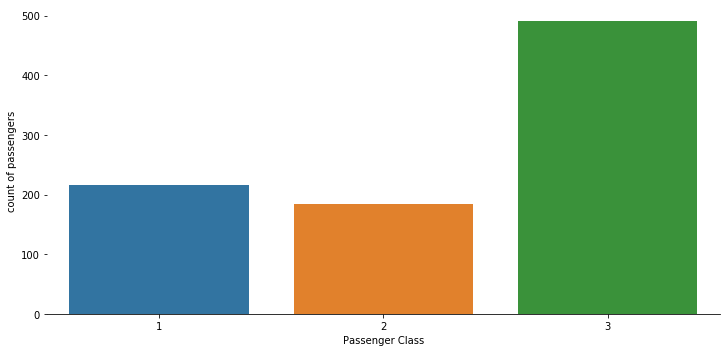

In [35]:
count_first = train.groupby('Pclass')['PassengerId'].count()
print(count_first)

class_data = sns.factorplot('Pclass', data=train, kind='count', aspect = 2)
class_data.despine(left=True)
class_data.set_ylabels("count of passengers")
class_data.set_xlabels("Passenger Class")
plt.show()

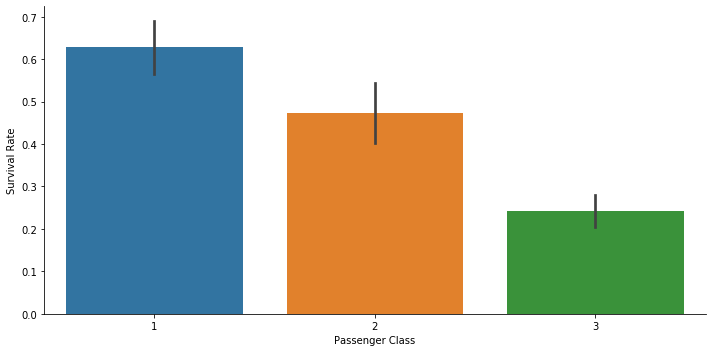

In [44]:
survival_by_class = sns.factorplot('Pclass','Survived',data = train, kind = 'bar', aspect = 2)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

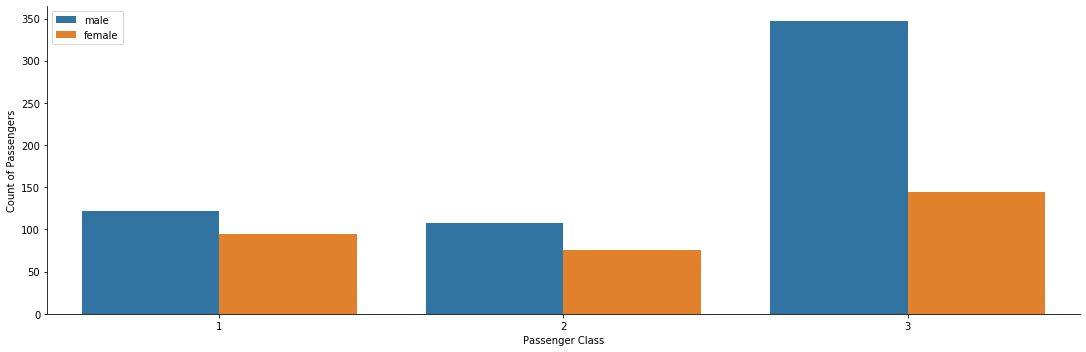

In [38]:
gender_class = sns.factorplot('Pclass', data = train, hue = 'Sex',kind = 'count', legend = False, aspect = 3)
plt.legend(loc = "upper left")
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

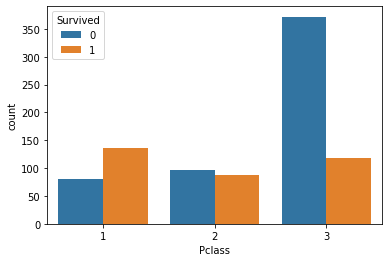

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=train)

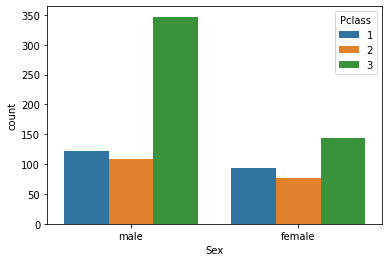

In [18]:
sns.countplot(x='Sex', hue='Pclass', data=train)

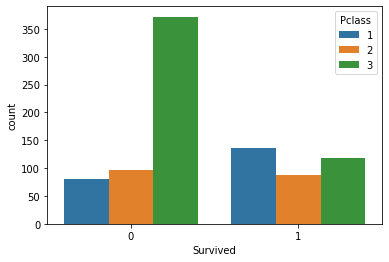

In [21]:
sns.countplot(x='Survived', hue='Pclass', data=train)

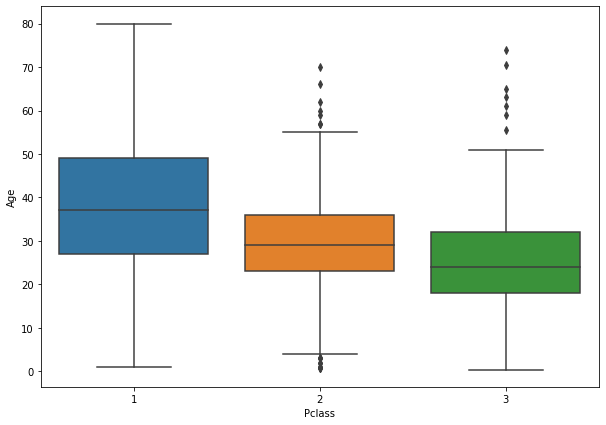

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

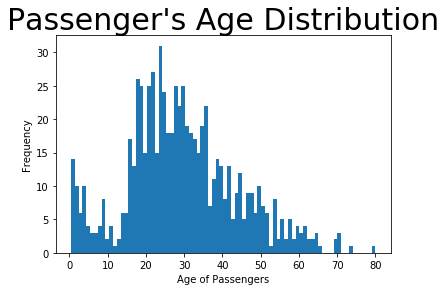

In [34]:
age_data = train['Age']
plt.hist(age_data.dropna(), bins = 80) #As the max age is 80
plt.xlabel("Age of Passengers")
plt.ylabel("Frequency")
plt.title("Passenger's Age Distribution", fontsize = 30, color = 'black')
plt.show()


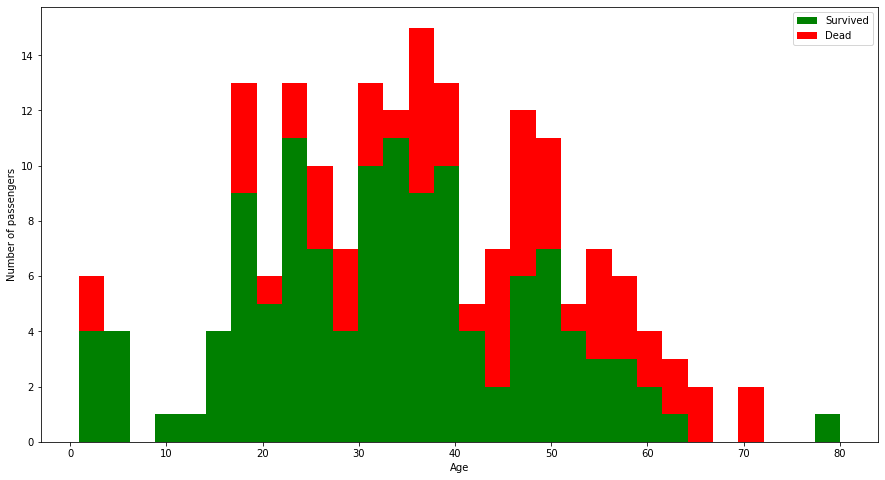

In [45]:
plt.figure(figsize=(15,8))
plt.hist([train.dropna()[train.dropna()['Survived']==1]['Age'], train.dropna()[train.dropna()['Survived']==0]['Age']], stacked=True,
         color = ['g','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


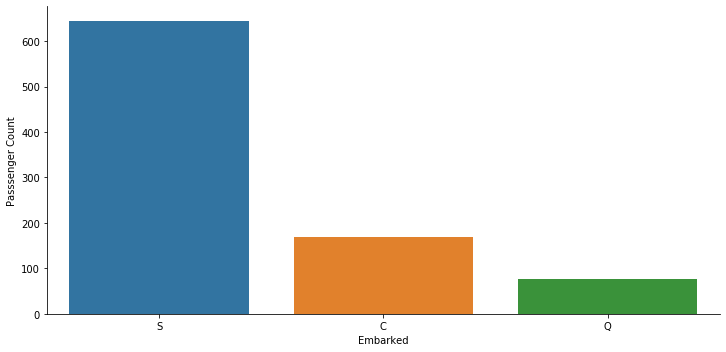

In [37]:
embarked_count = train.groupby('Embarked')['PassengerId'].count()
print(embarked_count)

embarked_data = sns.factorplot('Embarked', data = train, kind = 'count', aspect = 2)
plt.ylabel("Passsenger Count")
plt.show()

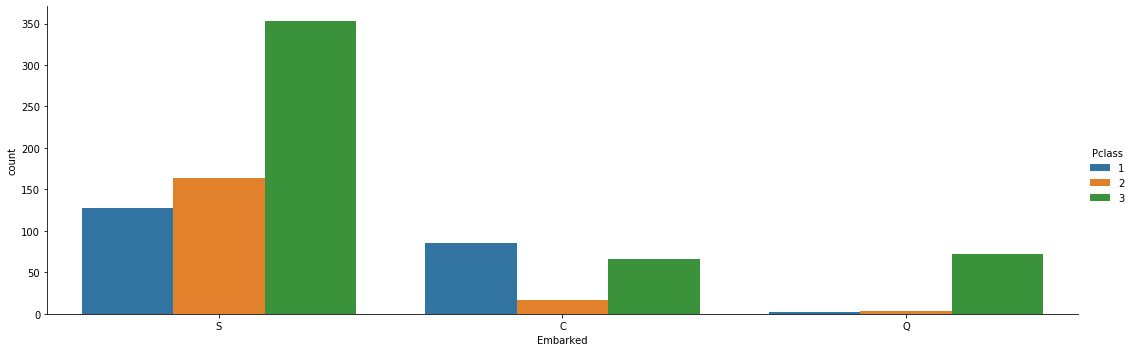

In [39]:
embarked_class = sns.factorplot('Embarked', data = train, hue = 'Pclass',kind = 'count', aspect = 3)
plt.show()